In [4]:
import os
import cv2
import json
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
%matplotlib inline

In [5]:
labels = loadmat('../data/raw/LabeledCaptions.mat')
print(labels.keys())

dict_keys(['__header__', '__version__', '__globals__', 'captions'])


In [6]:
def convert_to_rgb(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

Training data only includes Jan-March of 2003 -> sepatate out these captions

In [7]:
details = labels['captions']
captions = {}
print(np.shape(details)[1])
print(details[:,507])

28204
[ array([[ (array([ "Director/actor <IN> Clint Eastwood </IN> escorts his wife <OUT> Dina Ruiz </OUT> during red-carpet arrivals for 'Mystic River' at the 56th International Film Festival in Cannes, May 23, 2003. Eastwood's film entry is one of 20 presented in competition for the Palme d'Or (Golden Palm) at the 12-day film festival on the French Riviera. Photo by Vincent Kessler/Reuters"],
      dtype='<U368'), array(['2003/05/23/img_709.jpg'],
      dtype='<U22'), array([[array(['Clint Eastwood'],
      dtype='<U14'),
        array(['Dina Ruiz'],
      dtype='<U9')]], dtype=object))]],
      dtype=[('caption', 'O'), ('picname', 'O'), ('names', 'O')])]


In [8]:
for cap in range(np.shape(details)[1]):
    try:
        identity = str(details[:,cap].tolist()).split('), array([[array([\'')[1].split('\'],')[0]
        img_name = str(details[:,cap].tolist()).split('.jpg')[0].split('array([\'20')[1]
        if img_name[:2]=='03'and img_name[3:5] in ['01','02','03']:
            captions[img_name] = identity
    except:
        pass

In [27]:
print(captions)

{'03/01/19/img_592': 'Robert Downey', '03/01/21/img_192': 'John Snow', '03/03/07/img_1119': 'Queen Latifah', '03/03/04/img_1024': 'Chairman Henri Proglio', '03/02/24/img_635': 'President Jacques Chirac', '03/02/18/img_467': 'Richard Gephardt', '03/03/06/img_177': 'President George W', '03/03/17/img_1137': 'Meryl Streep', '03/02/03/img_309': 'Dr. Imad Khadduri', '03/03/04/img_493': 'Peter Gabriel', '03/01/18/img_324': 'Selma Hayek', '03/01/23/img_441': 'Minister Igor Ivanov', '03/01/19/img_962': 'President Hugo Chavez', '03/01/15/img_244': 'Administrator Christie Whitman', '03/02/13/img_396': 'George Clooney', '03/02/21/img_1170': 'Prime Minister Abdullah Gul', '03/01/25/img_2145': 'Charles Taylor', '03/03/04/img_1190': 'Prime Minister Abdullah Gul', '03/02/06/img_931': 'Roger Moore', '03/03/23/img_672': 'Cameron Diaz', '03/02/26/img_951': 'President George W', '03/03/19/img_314': 'Prime Minister Junichiro Koizumi', '03/01/17/img_467': 'Meryl Streep', '03/03/10/img_418': 'Adrien Brody',

<b>First collect training images from respective folders</b>

In [10]:
accum_imgs = []
for dirpath,_,filename in os.walk('../data/raw'):
     if any(f.endswith('.jpg') for f in filename):
        for f in filename:
             accum_imgs.append(os.path.join(dirpath, f))

In [11]:
len(accum_imgs)

5267

<b>Now we can analyse the images</b>

In [12]:
haarCascade = '../../opencv-3.3.1/data/haarcascades/haarcascade_frontalface_alt.xml'
faceDetector = cv2.CascadeClassifier(haarCascade)

In some cases the face detector works...

In [13]:
img1 = cv2.imread(accum_imgs[1])
img1_grey = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
faces = faceDetector.detectMultiScale(img1_grey, 1.3, 5)

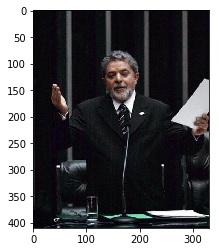

In [14]:
plt.imshow(convert_to_rgb(img1))

In [15]:
print(len(faces))

1


In [16]:
for (x,y,w,h) in faces:
    print(x,y,w,h)
    cv2.rectangle(img1,(x,y),(x+w,y+h),(0,255,0),2)

128 94 68 68


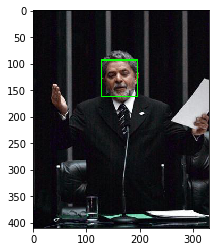

In [17]:
plt.imshow(convert_to_rgb(img1))

...but in others it does not

In [18]:
#for face in accum_imgs:
img2 = cv2.imread(accum_imgs[0])
img2_grey = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
faces = faceDetector.detectMultiScale(img2_grey, 1.3, 5)

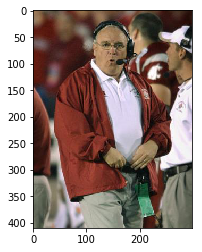

In [19]:
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))

In [20]:
print(len(faces))

0


Check how often faces are correctly identified

In [21]:
shuffled = sorted(accum_imgs, key=lambda k: np.random.random())
idx = int(np.floor(0.8*len(shuffled)))
training_imgs = shuffled[0:idx]
test_imgs = shuffled[idx:]
print(len(training_imgs)+len(test_imgs))

5267


Who:  President George Bush
Number of faces found: 3


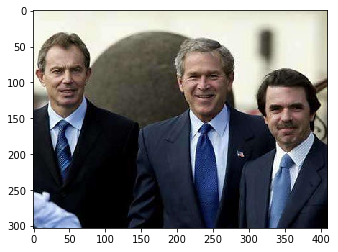

In [22]:
#for im in training_imgs:
im3_path=training_imgs[5]
title="03/"+im3_path[12:-4]
print("Who: ",captions[title])
img3 = cv2.imread(im3_path)
img3_grey = cv2.cvtColor(img3, cv2.COLOR_BGR2GRAY)
faces = faceDetector.detectMultiScale(img3_grey, 1.3, 5)
print("Number of faces found: %d"%len(faces))
plt.imshow(convert_to_rgb(img3))

Our model doesn't predict <i>who</i> is in the photos at this stage, but we can still count how many faces should be identified

Who:  President Bush
Number of faces found: 2
263 55 83 83
54 106 80 80


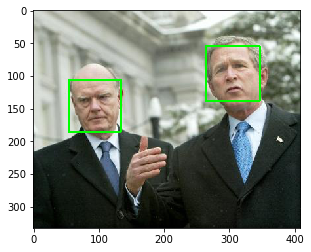

In [23]:
im4_path=training_imgs[106]
title="03/"+im4_path[12:-4]
print("Who: ",captions[title])
img4 = cv2.imread(im4_path)
img4_grey = cv2.cvtColor(img4, cv2.COLOR_BGR2GRAY)
faces = faceDetector.detectMultiScale(img4_grey, 1.3, 5)
print("Number of faces found: %d"%len(faces))
for (x,y,w,h) in faces:
    print(x,y,w,h)
    cv2.rectangle(img4,(x,y),(x+w,y+h),(0,255,0),2)
plt.imshow(convert_to_rgb(img4))

Who:  Monica Seles
Number of faces found: 1
187 43 105 105


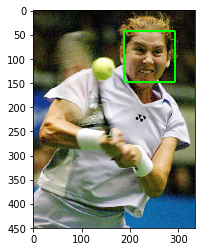

In [25]:
im5_path=training_imgs[500]
title="03/"+im5_path[12:-4]
print("Who: ",captions[title])
img5 = cv2.imread(im5_path)
img5_grey = cv2.cvtColor(img5, cv2.COLOR_BGR2GRAY)
faces = faceDetector.detectMultiScale(img5_grey, 1.3, 5)
print("Number of faces found: %d"%len(faces))
for (x,y,w,h) in faces:
    print(x,y,w,h)
    cv2.rectangle(img5,(x,y),(x+w,y+h),(0,255,0),2)
plt.imshow(convert_to_rgb(img5))

Problem: we have only dealt with one name cases but many photos contain >1 subject. Another notebook will be opened to figure this out.